# Nonogram Solver

A nonogram, also known as a "paint-by-numbers" puzzle or a "Japanese crossword," is a logic-based grid puzzle. It involves a rectangular grid of cells that need to be filled or left blank to reveal a hidden picture or pattern.

In this notebook, we are going to model and solve a nonogram using the Python package `pyChoco`.

First of all, we need to declare the nonogram we want to solve. We will use the following nonogram as an example:

In [1]:
background_color = (255, 255, 255)
dimension = (20, 16)
nonogram = {'rows': [[(6, (44, 70, 33))], [(1, (44, 70, 33)), (6, (87, 154, 65)), (1, (44, 70, 33))],
                     [(3, (44, 70, 33)), (1, (87, 154, 65)), (2, (44, 70, 33)), (8, (87, 154, 65)), (2, (44, 70, 33)),
                      (1, (87, 154, 65)), (3, (44, 70, 33))],
                     [(2, (44, 70, 33)), (3, (87, 154, 65)), (1, (44, 70, 33)), (3, (0, 0, 0)), (2, (87, 154, 65)),
                      (3, (0, 0, 0)), (1, (44, 70, 33)), (3, (87, 154, 65)), (2, (44, 70, 33))],
                     [(2, (223, 166, 191)), (1, (175, 46, 100)), (3, (87, 154, 65)), (2, (0, 0, 0)), (2, (87, 154, 65)),
                      (2, (0, 0, 0)), (3, (87, 154, 65)), (1, (175, 46, 100)), (2, (223, 166, 191))],
                     [(2, (223, 166, 191)), (1, (44, 70, 33)), (2, (87, 154, 65)), (3, (0, 0, 0)), (2, (87, 154, 65)),
                      (3, (0, 0, 0)), (2, (87, 154, 65)), (1, (44, 70, 33)), (2, (223, 166, 191))],
                     [(2, (223, 166, 191)), (2, (44, 70, 33)), (8, (87, 154, 65)), (2, (44, 70, 33)),
                      (2, (223, 166, 191))], [(1, (0, 0, 0)), (12, (94, 57, 15)), (1, (0, 0, 0))],
                     [(1, (0, 0, 0)), (3, (246, 202, 149)), (6, (94, 57, 15)), (3, (246, 202, 149)), (1, (0, 0, 0))],
                     [(1, (0, 0, 0)), (1, (246, 202, 149)), (8, (94, 57, 15)), (1, (246, 202, 149)), (1, (0, 0, 0))],
                     [(1, (0, 0, 0)), (2, (246, 202, 149)), (1, (94, 57, 15)), (1, (246, 202, 149)), (2, (94, 57, 15)),
                      (1, (246, 202, 149)), (1, (94, 57, 15)), (2, (246, 202, 149)), (1, (0, 0, 0))],
                     [(1, (87, 154, 65)), (1, (0, 0, 0)), (1, (246, 202, 149)), (1, (94, 57, 15)), (1, (246, 202, 149)),
                      (2, (94, 57, 15)), (1, (246, 202, 149)), (1, (94, 57, 15)), (1, (246, 202, 149)), (1, (0, 0, 0)),
                      (1, (87, 154, 65))],
                     [(1, (0, 0, 0)), (1, (246, 202, 149)), (1, (94, 57, 15)), (1, (246, 202, 149)), (2, (94, 57, 15)),
                      (1, (246, 202, 149)), (1, (94, 57, 15)), (1, (246, 202, 149)), (1, (0, 0, 0))],
                     [(1, (0, 0, 0)), (2, (94, 57, 15)), (1, (246, 202, 149)), (2, (94, 57, 15)), (1, (246, 202, 149)),
                      (2, (94, 57, 15)), (1, (0, 0, 0))],
                     [(1, (0, 0, 0)), (2, (246, 202, 149)), (2, (94, 57, 15)), (2, (246, 202, 149)), (1, (0, 0, 0))],
                     [(6, (0, 0, 0))]],
            'columns': [[(2, (44, 70, 33)), (1, (223, 166, 191))], [(2, (44, 70, 33)), (2, (223, 166, 191))],
                        [(1, (44, 70, 33)), (1, (87, 154, 65)), (1, (175, 46, 100)), (2, (223, 166, 191))],
                        [(3, (87, 154, 65)), (1, (44, 70, 33)), (1, (223, 166, 191)), (2, (0, 0, 0))],
                        [(1, (44, 70, 33)), (3, (87, 154, 65)), (1, (44, 70, 33)), (1, (94, 57, 15)),
                         (1, (246, 202, 149)), (2, (0, 0, 0)), (1, (87, 154, 65))],
                        [(2, (44, 70, 33)), (2, (87, 154, 65)), (1, (44, 70, 33)), (1, (94, 57, 15)),
                         (3, (246, 202, 149)), (3, (0, 0, 0))],
                        [(1, (44, 70, 33)), (1, (87, 154, 65)), (3, (0, 0, 0)), (1, (87, 154, 65)), (1, (94, 57, 15)),
                         (1, (246, 202, 149)), (1, (94, 57, 15)), (3, (246, 202, 149)), (1, (94, 57, 15)),
                         (1, (0, 0, 0))],
                        [(1, (44, 70, 33)), (2, (87, 154, 65)), (3, (0, 0, 0)), (1, (87, 154, 65)), (7, (94, 57, 15)),
                         (1, (246, 202, 149)), (1, (0, 0, 0))],
                        [(1, (44, 70, 33)), (2, (87, 154, 65)), (1, (0, 0, 0)), (1, (0, 0, 0)), (1, (87, 154, 65)),
                         (3, (94, 57, 15)), (5, (246, 202, 149)), (1, (0, 0, 0))],
                        [(1, (44, 70, 33)), (6, (87, 154, 65)), (8, (94, 57, 15)), (1, (0, 0, 0))],
                        [(1, (44, 70, 33)), (6, (87, 154, 65)), (8, (94, 57, 15)), (1, (0, 0, 0))],
                        [(1, (44, 70, 33)), (2, (87, 154, 65)), (3, (0, 0, 0)), (1, (87, 154, 65)), (3, (94, 57, 15)),
                         (5, (246, 202, 149)), (1, (0, 0, 0))],
                        [(1, (44, 70, 33)), (2, (87, 154, 65)), (3, (0, 0, 0)), (1, (87, 154, 65)), (7, (94, 57, 15)),
                         (1, (246, 202, 149)), (1, (0, 0, 0))],
                        [(1, (44, 70, 33)), (1, (87, 154, 65)), (1, (0, 0, 0)), (1, (0, 0, 0)), (1, (87, 154, 65)),
                         (1, (94, 57, 15)), (1, (246, 202, 149)), (1, (94, 57, 15)), (3, (246, 202, 149)),
                         (1, (94, 57, 15)), (1, (0, 0, 0))],
                        [(2, (44, 70, 33)), (2, (87, 154, 65)), (1, (44, 70, 33)), (1, (94, 57, 15)),
                         (3, (246, 202, 149)), (3, (0, 0, 0))],
                        [(1, (44, 70, 33)), (3, (87, 154, 65)), (1, (44, 70, 33)), (1, (94, 57, 15)),
                         (1, (246, 202, 149)), (2, (0, 0, 0)), (1, (87, 154, 65))],
                        [(3, (87, 154, 65)), (1, (44, 70, 33)), (1, (223, 166, 191)), (2, (0, 0, 0))],
                        [(1, (44, 70, 33)), (1, (87, 154, 65)), (1, (175, 46, 100)), (2, (223, 166, 191))],
                        [(2, (44, 70, 33)), (2, (223, 166, 191))], [(2, (44, 70, 33)), (1, (223, 166, 191))]]}
# get colors from rows and columns
colors = set()
for row in nonogram['rows']:
    for count, color in row:
        colors.add(color)
for col in nonogram['columns']:
    for count, color in col:
        colors.add(color)
colors = sorted(list(colors))
colors = [background_color] + colors

Colors are defined in RGB format. The first color is the background color, the others are the colors of the nonogram.

## A CP model for the nonogram

The nonogram is modeled as a set of constraints on a grid of variables. Each variable is an integer between 0 and the number of colors minus one.
The value 0 is the background color, the other values are the colors of the nonogram.
The constraints are defined by a deterministic finite automaton (DFA) that accepts the words that represent the rows and columns of the nonogram. The DFA is defined by a regular expression that is built from the rows and columns of the nonogram. The regular expression is built based on the information declared in `nonogram`.

But, to begin, we have to create a model.

In [2]:
from pychoco import Model

model = Model("Nonogram")

The grid of variables is created. The variables are named `cell_i_j` where `i` is the row and `j` is the column.
The values of the variables are between 0 and the number of colors minus one.

In [3]:
cells = [[model.intvar(0, len(colors)-1, f"cell_{i}_{j}") for j in range(dimension[0])] for i in range(dimension[1])]

The DFA is defined by a regular expression that is built from the rows and columns of the nonogram.
To ease the construction of the regular expression, we define a function that returns the regular expression for a row or a column.

In [4]:
from pychoco import FiniteAutomaton

def dfa(sequence, rules):
    regexp = f"{colors.index(background_color)}*"
    for i, (count, color) in enumerate(rules):
        regexp += f"{colors.index(color)}{{{count}}}{colors.index(background_color)}*"
    model.regular(sequence, FiniteAutomaton(regexp, bounds=[0, len(colors)])).post()

Then, an iteration on the rows and columns of the nonogram is done to define the constraints.

In [5]:
for i, row in enumerate(nonogram['rows']):
    dfa(cells[i], row)
for i, column in enumerate(nonogram['columns']):
    dfa([col[i] for col in cells], column)

The model is ready to be solved.
We can display some statistics about the resolution.

In [6]:
model.get_solver().show_short_statistics()
model.get_solver().solve()

Model[Nonogram], 1 Solutions, Resolution time 0,001s, 1 Nodes (897,4 n/s), 0 Backtracks, 0 Backjumps, 0 Fails, 0 Restarts


True

Interestingly enough, the resolution is only based on deductions. No branching is needed.

The solution is displayed as a grid of colors. We use the `matplotlib` library to display the grid.

Say hi to ...

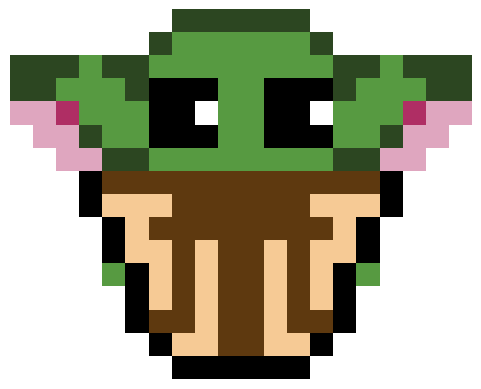

In [7]:
import matplotlib.pyplot as plt
import numpy as np


grille = np.array([[colors[cells[i][j].get_lb()] for j in range(dimension[0])] for i in range(dimension[1])])
cmap = plt.cm.colors.ListedColormap(colors)

fig, ax = plt.subplots()
ax.imshow(grille, cmap=cmap, vmin=0, vmax=len(colors) - 1)
ax.axis('off')
plt.show()